In [1]:
import pandas as pd
import numpy as np
import argparse
import itertools
import matplotlib.pyplot as plt

import re
import os
from os import path
import sys
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/tmp/ipykernel_151895/3072613290.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Exeriment setup

Same as exp, but no pinning of any cores


In [2]:
df = pd.read_csv("../logs/nopin/combined.csv")
print(df.columns.tolist())

['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nmappers', 'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std', 'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std', 'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std', 'SinkbackPressuredTimeMsPerSecond_avg', 'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%', 'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg', 'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg', 'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg', 'SourcebusyTimeMsPerSecond_std', 'SourcebackPressuredTimeMsPerSecond_avg', 'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%', 'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg', 'MappernumRecordsInPerSecond_std', 'MappernumRecordsOutPerSecond_avg', 'MappernumRecordsOutPerSecond_std', 'MapperbusyTimeMsPerSecond_avg', 'MapperbusyTimeMsPerSecond_std', 'MapperbackPressuredTimeMsPerSecond_avg', 'MapperbackPressuredTim

## Data for Iteration 1

Joules diff between 16 mappers vs 4 mappers: 0.6947114093959732
instructions diff between 16 mappers vs 4 mappers: 0.998426512775158
instructions diff between 16 mappers vs 4 mappers: 0.998426512775158


/tmp/ipykernel_151895/3981836362.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Joules diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['joules']) / int(df0[(df0.nmappers == 4)]['joules'])}")
/tmp/ipykernel_151895/3981836362.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"instructions diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['instructions']) / int(df0[(df0.nmappers == 4)]['instructions'])}")
/tmp/ipykernel_151895/3981836362.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"instructions diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['instructions']) / int(df0[(df0.nmappers == 4)]['instructions'])}")


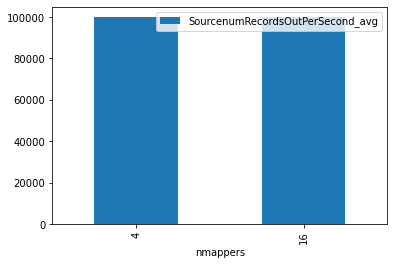

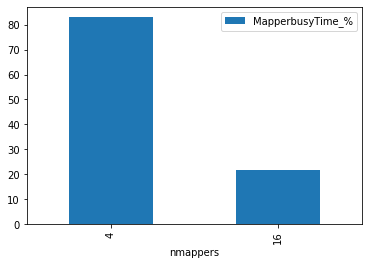

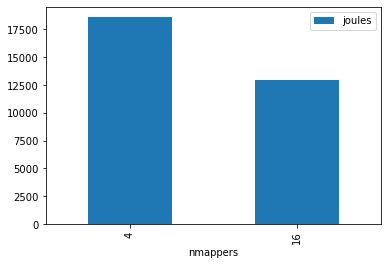

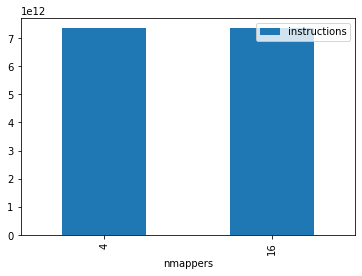

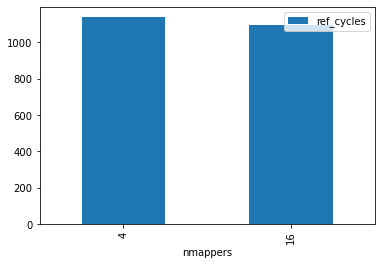

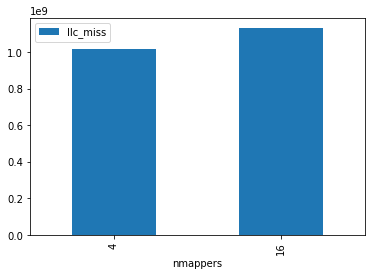

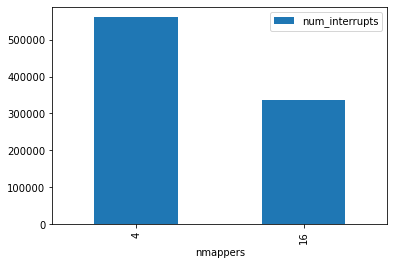

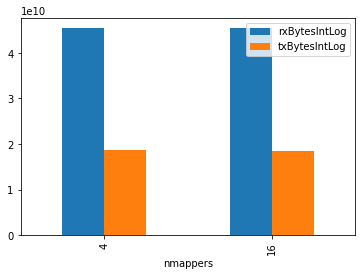

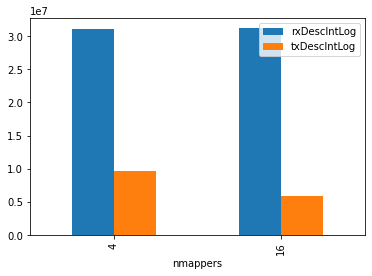

In [3]:
df0 = df[(df.i == 1)]
df0
df0.plot(x="nmappers", y=["SourcenumRecordsOutPerSecond_avg"], kind="bar") 
df0.plot(x="nmappers", y=["MapperbusyTime_%"], kind="bar") 

df0.plot(x="nmappers", y=["joules"], kind="bar") 
df0.plot(x="nmappers", y=["instructions"], kind="bar") 
df0.plot(x="nmappers", y=["ref_cycles"], kind="bar") 
df0.plot(x="nmappers", y=["llc_miss"], kind="bar")
df0.plot(x="nmappers", y=["num_interrupts"], kind="bar") 
df0.plot(x="nmappers", y=["rxBytesIntLog", "txBytesIntLog"], kind="bar") 
df0.plot(x="nmappers", y=["rxDescIntLog", "txDescIntLog"], kind="bar")
print(f"Joules diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['joules']) / int(df0[(df0.nmappers == 4)]['joules'])}")
print(f"instructions diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['instructions']) / int(df0[(df0.nmappers == 4)]['instructions'])}")
print(f"instructions diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['instructions']) / int(df0[(df0.nmappers == 4)]['instructions'])}")


In [4]:
# possible vals: core{core}_ 
#                           'rx_desc', 'rx_bytes', 'tx_desc', 'tx_bytes', 'instructions_diff', 
#                           'cycles_diff', 'ref_cycles_diff', 'llc_miss_diff'
#                           num_interrupts
def plotMC(name, df):
    ys=[]
    for core in range(0, 16):
        ys.append(f"core{core}_{name}")
    df.plot(x="nmappers", y=ys, kind="bar", legend=False, title=name) 

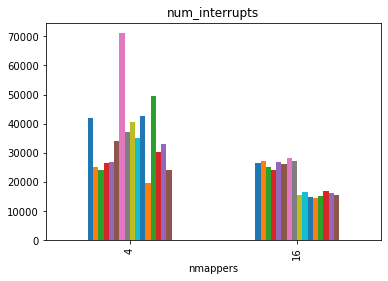

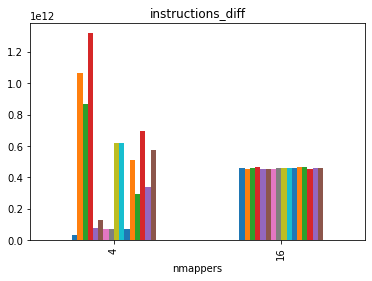

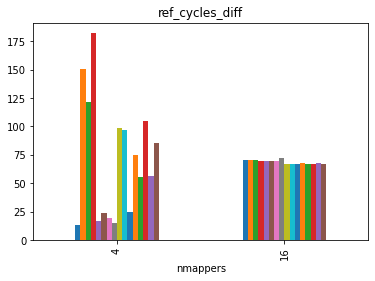

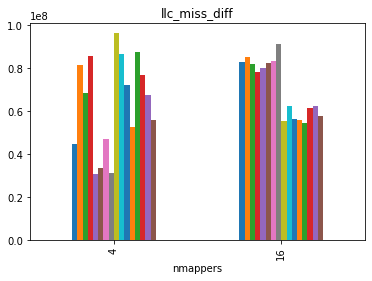

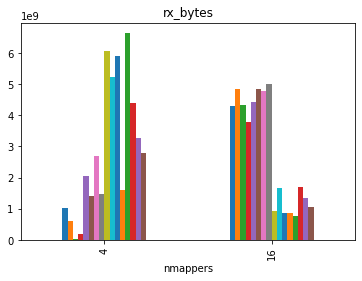

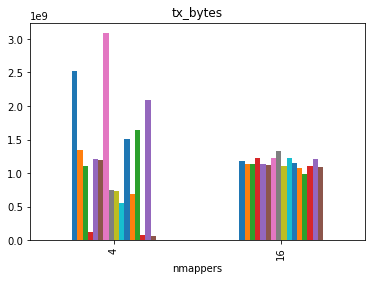

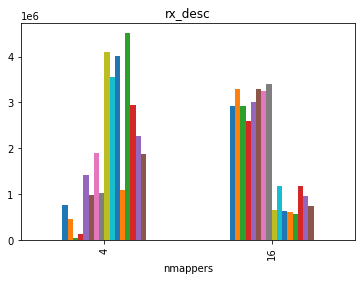

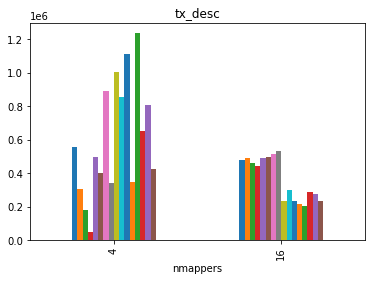

In [5]:
plotMC('num_interrupts', df0)
plotMC('instructions_diff', df0)
plotMC('ref_cycles_diff', df0)
plotMC('llc_miss_diff', df0)
plotMC('rx_bytes', df0)
plotMC('tx_bytes', df0)
plotMC('rx_desc', df0)
plotMC('tx_desc', df0)

In [6]:
#core10_state0_below
# possible vals: core{core}_ 
#                           'rx_desc', 'rx_bytes', 'tx_desc', 'tx_bytes', 'instructions_diff', 
#                           'cycles_diff', 'ref_cycles_diff', 'llc_miss_diff'
#                           num_interrupts
def plotCS(state, name, axes, df, r=0):
    ys=[]
    for core in range(0, 16):
        ys.append(f"core{core}_state{state}_{name}")
    df.plot(x="nmappers", y=ys, kind="bar", fontsize=22, legend=False, title=f"state{state}_{name}", ax=axes[r, state]) 


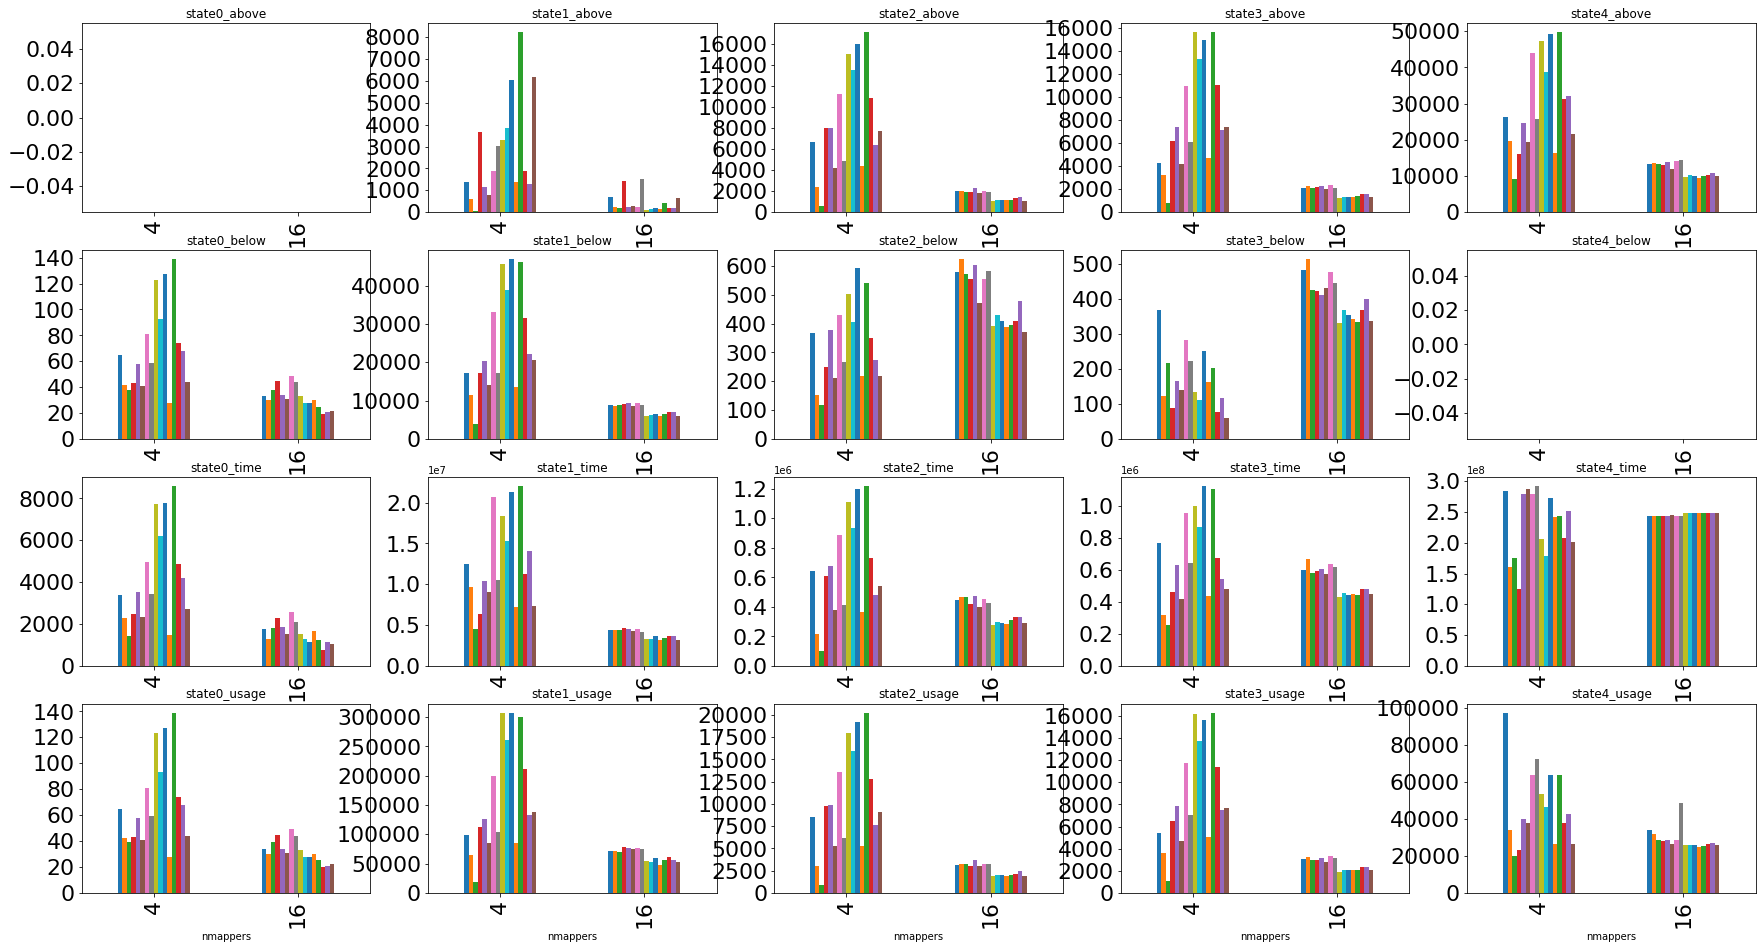

In [7]:

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30,16))

#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])

plotCS(0, "above", axes, df0)
plotCS(1, "above", axes, df0)
plotCS(2, "above", axes, df0)
plotCS(3, "above", axes, df0)
plotCS(4, "above", axes, df0)

plotCS(0, "below", axes, df0, 1)
plotCS(1, "below", axes, df0, 1)
plotCS(2, "below", axes, df0, 1)
plotCS(3, "below", axes, df0, 1)
plotCS(4, "below", axes, df0, 1)

plotCS(0, "time", axes, df0, 2)
plotCS(1, "time", axes, df0, 2)
plotCS(2, "time", axes, df0, 2)
plotCS(3, "time", axes, df0, 2)
plotCS(4, "time", axes, df0, 2)

plotCS(0, "usage", axes, df0, 3)
plotCS(1, "usage", axes, df0, 3)
plotCS(2, "usage", axes, df0, 3)
plotCS(3, "usage", axes, df0, 3)
plotCS(4, "usage", axes, df0, 3)

In [8]:
summap4 = 0
summap16 = 0
for state in range(0, 5):
    dfmapper4 = df0[(df0.nmappers == 4)]
    dfmapper16 = df0[(df0.nmappers == 16)]
    
    mapper4 = 0
    mapper16 = 0

    for core in range(0, 16):
        mapper4 += int(dfmapper4[f"core{core}_state{state}_time"])
        mapper16 += int(dfmapper16[f"core{core}_state{state}_time"])
    summap4 += mapper4
    summap16 += mapper16
    print(f"state{state}_time mapper4: {mapper4}, mapper16: {mapper16}, ratio (mapper4/mapper16) = {round(mapper4/mapper16,2)}")
print(f"summap4 = {summap4}, summap16 = {summap16}, ratio={summap4/summap16}")
    
print("")
for state in range(0, 5):
    dfmapper4 = df0[(df0.nmappers == 4)]
    dfmapper16 = df0[(df0.nmappers == 16)]
    
    mapper4 = 0
    mapper16 = 0

    for core in range(0, 16):
        mapper4 += int(dfmapper4[f"core{core}_state{state}_usage"])
        mapper16 += int(dfmapper16[f"core{core}_state{state}_usage"])
    print(f"state{state}_usage mapper4: {mapper4}, mapper16: {mapper16}, ratio (mapper4/mapper16) = {round(mapper4/mapper16,2)}")


state0_time mapper4: 67414, mapper16: 24994, ratio (mapper4/mapper16) = 2.7
state1_time mapper4: 200478453, mapper16: 62520478, ratio (mapper4/mapper16) = 3.21
state2_time mapper4: 10501999, mapper16: 5958315, ratio (mapper4/mapper16) = 1.76
state3_time mapper4: 10672492, mapper16: 8498850, ratio (mapper4/mapper16) = 1.26
state4_time mapper4: 3685413472, mapper16: 3939465988, ratio (mapper4/mapper16) = 0.94
summap4 = 3907133830, summap16 = 4016468625, ratio=0.972778376925576

state0_usage mapper4: 1124, mapper16: 513, ratio (mapper4/mapper16) = 2.19
state1_usage mapper4: 2549548, mapper16: 1036676, ratio (mapper4/mapper16) = 2.46
state2_usage mapper4: 165323, mapper16: 41989, ratio (mapper4/mapper16) = 3.94
state3_usage mapper4: 141485, mapper16: 41643, ratio (mapper4/mapper16) = 3.4
state4_usage mapper4: 748478, mapper16: 460659, ratio (mapper4/mapper16) = 1.62


/tmp/ipykernel_151895/2496540669.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper4 += int(dfmapper4[f"core{core}_state{state}_time"])
/tmp/ipykernel_151895/2496540669.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper16 += int(dfmapper16[f"core{core}_state{state}_time"])
/tmp/ipykernel_151895/2496540669.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper4 += int(dfmapper4[f"core{core}_state{state}_usage"])
/tmp/ipykernel_151895/2496540669.py:28: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper16 += int(dfmapper16[f"core{core}_state{state}_usage"])


## Data for Iteration 2

Joules diff between 16 mappers vs 4 mappers: 0.7152220219564149


/tmp/ipykernel_151895/949707032.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Joules diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['joules']) / int(df0[(df0.nmappers == 4)]['joules'])}")


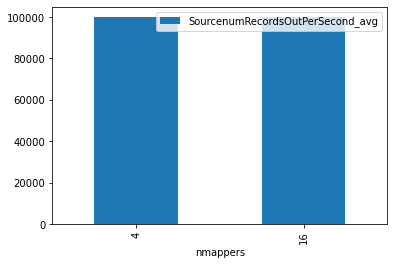

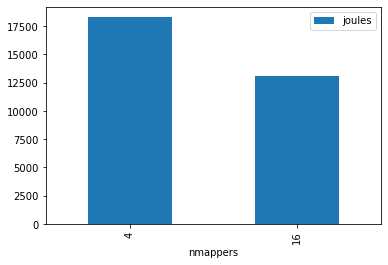

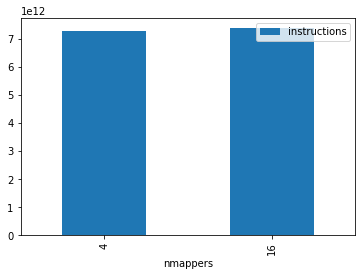

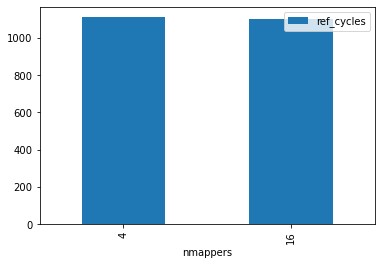

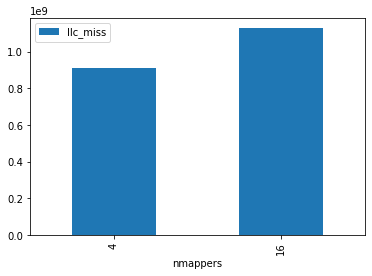

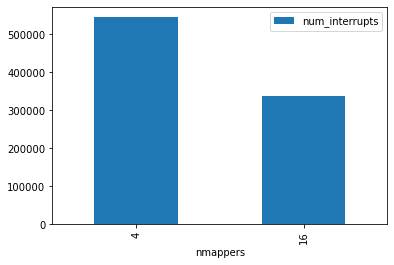

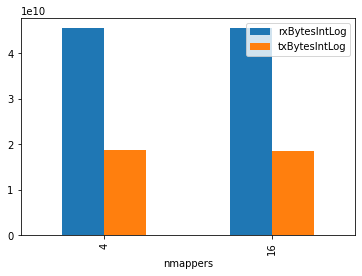

In [10]:
df0 = df[(df.i == 2)]
df0
df0.plot(x="nmappers", y=["SourcenumRecordsOutPerSecond_avg"], kind="bar") 
df0.plot(x="nmappers", y=["joules"], kind="bar") 
df0.plot(x="nmappers", y=["instructions"], kind="bar") 
df0.plot(x="nmappers", y=["ref_cycles"], kind="bar") 
df0.plot(x="nmappers", y=["llc_miss"], kind="bar") 
df0.plot(x="nmappers", y=["num_interrupts"], kind="bar") 
df0.plot(x="nmappers", y=["rxBytesIntLog", "txBytesIntLog"], kind="bar") 
print(f"Joules diff between 16 mappers vs 4 mappers: {int(df0[(df0.nmappers == 16)]['joules']) / int(df0[(df0.nmappers == 4)]['joules'])}")



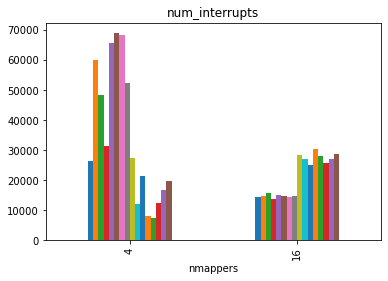

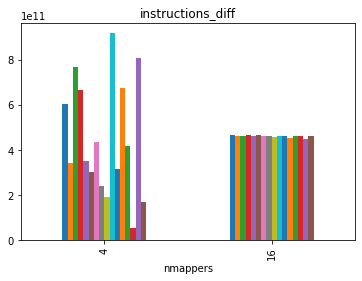

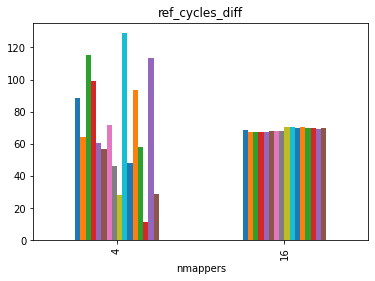

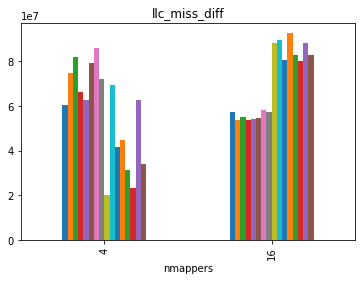

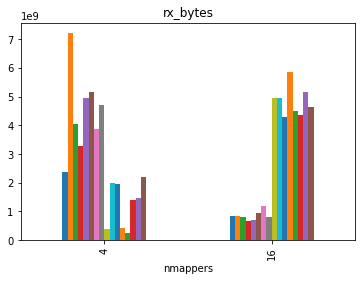

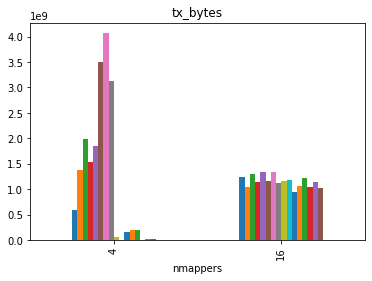

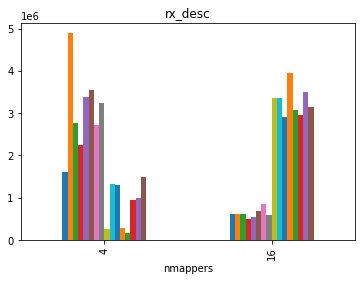

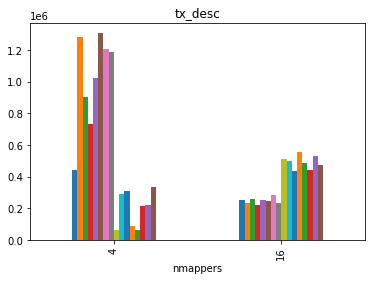

In [11]:
plotMC('num_interrupts', df0)
plotMC('instructions_diff', df0)
plotMC('ref_cycles_diff', df0)
plotMC('llc_miss_diff', df0)
plotMC('rx_bytes', df0)
plotMC('tx_bytes', df0)
plotMC('rx_desc', df0)
plotMC('tx_desc', df0)

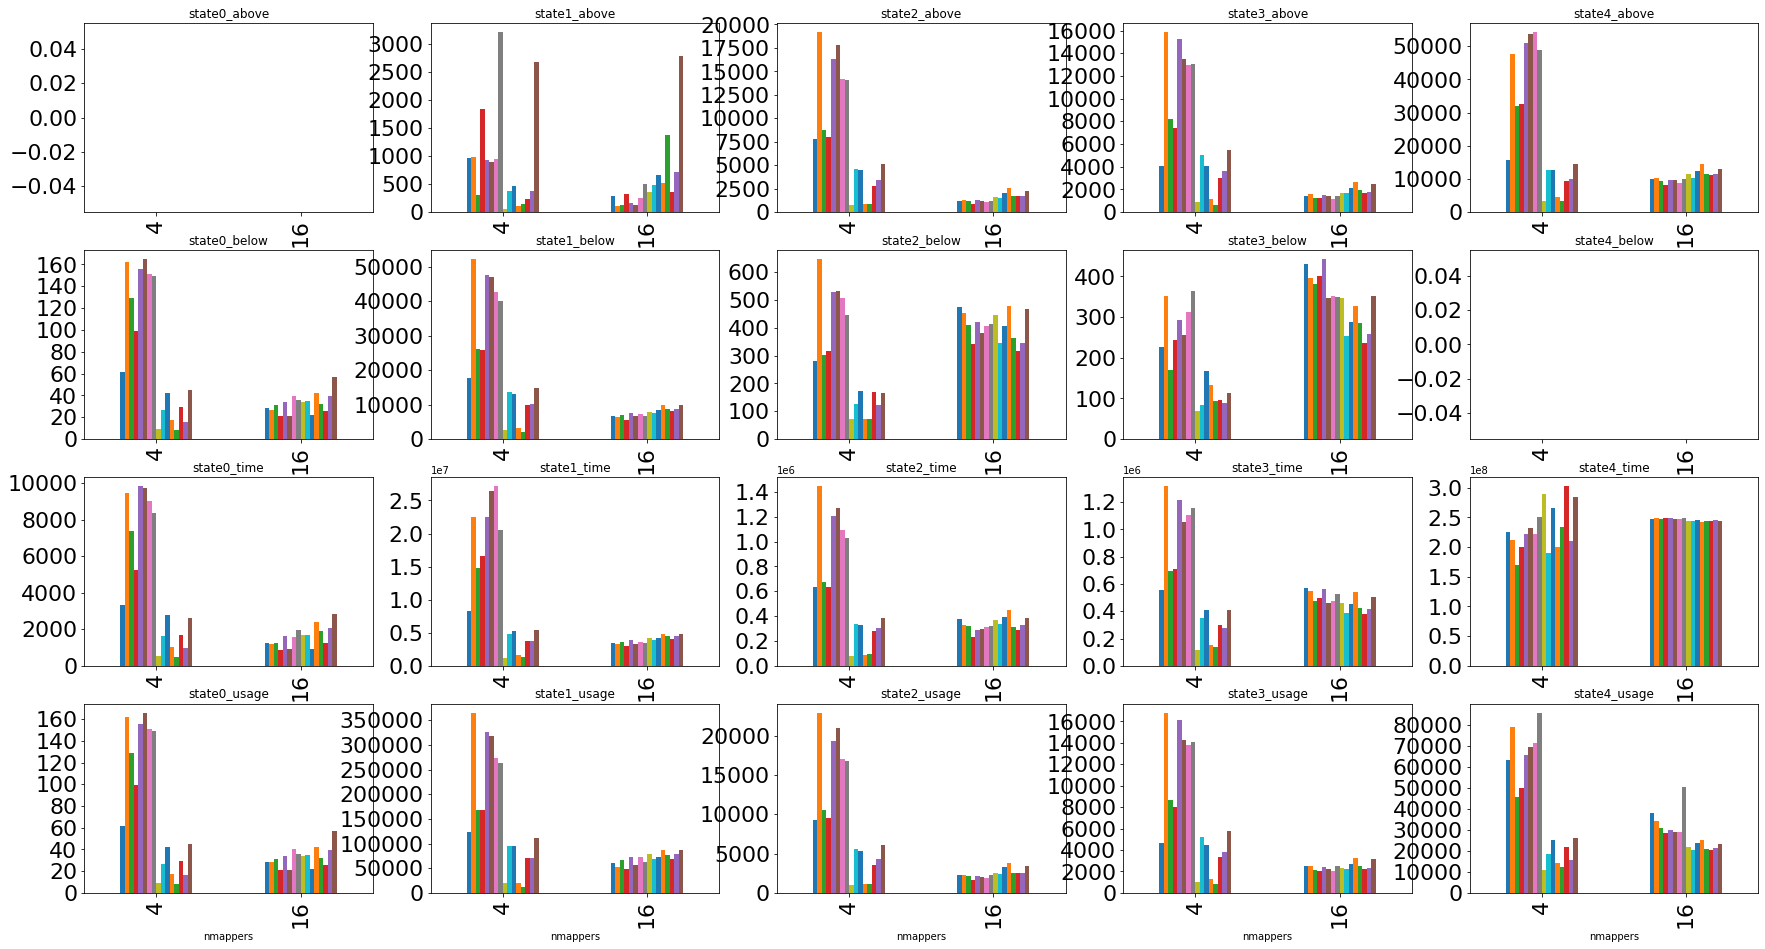

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30,16))

plotCS(0, "above", axes, df0)
plotCS(1, "above", axes, df0)
plotCS(2, "above", axes, df0)
plotCS(3, "above", axes, df0)
plotCS(4, "above", axes, df0)

plotCS(0, "below", axes, df0, 1)
plotCS(1, "below", axes, df0, 1)
plotCS(2, "below", axes, df0, 1)
plotCS(3, "below", axes, df0, 1)
plotCS(4, "below", axes, df0, 1)

plotCS(0, "time", axes, df0, 2)
plotCS(1, "time", axes, df0, 2)
plotCS(2, "time", axes, df0, 2)
plotCS(3, "time", axes, df0, 2)
plotCS(4, "time", axes, df0, 2)

plotCS(0, "usage", axes, df0, 3)
plotCS(1, "usage", axes, df0, 3)
plotCS(2, "usage", axes, df0, 3)
plotCS(3, "usage", axes, df0, 3)
plotCS(4, "usage", axes, df0, 3)

In [13]:
for state in range(0, 5):
    dfmapper4 = df0[(df0.nmappers == 4)]
    dfmapper16 = df0[(df0.nmappers == 16)]
    
    mapper4 = 0
    mapper16 = 0

    for core in range(0, 16):
        mapper4 += int(dfmapper4[f"core{core}_state{state}_time"])
        mapper16 += int(dfmapper16[f"core{core}_state{state}_time"])
    print(f"state{state}_time mapper4: {mapper4}, mapper16: {mapper16}, ratio (mapper4/mapper16) = {round(mapper4/mapper16,2)}")

print("")
for state in range(0, 5):
    dfmapper4 = df0[(df0.nmappers == 4)]
    dfmapper16 = df0[(df0.nmappers == 16)]
    
    mapper4 = 0
    mapper16 = 0

    for core in range(0, 16):
        mapper4 += int(dfmapper4[f"core{core}_state{state}_usage"])
        mapper16 += int(dfmapper16[f"core{core}_state{state}_usage"])
    print(f"state{state}_usage mapper4: {mapper4}, mapper16: {mapper16}, ratio (mapper4/mapper16) = {round(mapper4/mapper16,2)}")


state0_time mapper4: 74161, mapper16: 25377, ratio (mapper4/mapper16) = 2.92
state1_time mapper4: 186116420, mapper16: 62887956, ratio (mapper4/mapper16) = 2.96
state2_time mapper4: 9907312, mapper16: 5346734, ratio (mapper4/mapper16) = 1.85
state3_time mapper4: 9972557, mapper16: 7681242, ratio (mapper4/mapper16) = 1.3
state4_time mapper4: 3709410036, mapper16: 3940340939, ratio (mapper4/mapper16) = 0.94

state0_usage mapper4: 1267, mapper16: 526, ratio (mapper4/mapper16) = 2.41
state1_usage mapper4: 2503801, mapper16: 1105232, ratio (mapper4/mapper16) = 2.27
state2_usage mapper4: 154446, mapper16: 39723, ratio (mapper4/mapper16) = 3.89
state3_usage mapper4: 122063, mapper16: 38915, ratio (mapper4/mapper16) = 3.14
state4_usage mapper4: 673813, mapper16: 446293, ratio (mapper4/mapper16) = 1.51


/tmp/ipykernel_151895/2028017893.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper4 += int(dfmapper4[f"core{core}_state{state}_time"])
/tmp/ipykernel_151895/2028017893.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper16 += int(dfmapper16[f"core{core}_state{state}_time"])
/tmp/ipykernel_151895/2028017893.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper4 += int(dfmapper4[f"core{core}_state{state}_usage"])
/tmp/ipykernel_151895/2028017893.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mapper16 += int(dfmapper16[f"core{core}_state{state}_usage"])
